# Tiny FSDL Walkthrough

## Preprocess

In [1]:
import logging
import os
import random

import cv2
import matplotlib.pyplot as plt

from tiny_fsdl.preprocess import Preprocess 


logging.basicConfig(level=logging.INFO)

prep_in_dir = "../data/raw_images/data1"
prep_out_dir = "../data/processed_images/data1"

# Relative locations
y = 11
w = 15
h = 25
digits_before = 4
digits_after = 2
x_before = 46
x_after = 89
    
preprocess = Preprocess(y, w, h)
preprocess.process_dir(
    input_dir=prep_in_dir,
    output_dir=prep_out_dir,
    digits_before=digits_before,
    digits_after=digits_after,
    x_before=x_before,
    x_after=x_after,
)

INFO:tiny_fsdl.preprocess:Beginning preprocessing. . .
100%|██████████| 127/127 [00:00<00:00, 5546.87it/s]
INFO:tiny_fsdl.preprocess:Finished preprocessing!
INFO:tiny_fsdl.preprocess:Total images 126 and crops 635


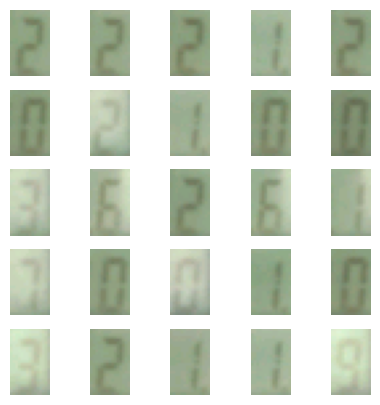

In [2]:
plt.figure(figsize=(5,5)) # specifying the overall grid size
for i in range(25):
    img_path = random.choice(os.listdir(prep_out_dir))
    img = cv2.imread(os.path.join(prep_out_dir, img_path))
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.axis('off')
    plt.imshow(img)
plt.show()

## Train

In [3]:
import os
import random
import shutil

labels = list(range(0,10))
labeled_dir = "../data/labeled_data/"

# Create subdirectories for each label
for label in labels:
    os.makedirs(os.path.join(labeled_dir, str(label)), exist_ok=True)

files = os.listdir(prep_out_dir)
for filename in files:
    try:
        shutil.move(os.path.join(prep_out_dir, filename), f"{labeled_dir}/{random.choice(labels)}")
    except:
        pass

In [4]:
# import splitfolders

# split_dir = "../data/split_data/"
# split_ratio = (0.7, 0.2, 0.1)
# seed = 1337

# splitfolders.ratio(
#     labeled_dir,
#     output=split_dir,
#     seed=seed,
#     ratio=split_ratio,
# )

In [5]:
import os

from tiny_fsdl.train import prep_data
from tiny_fsdl.train import Trainer


# General Params
seed = 1337

# Data Params
crop_dir = "../ml/data/raw_images/labeled_bmp_data/"
split_dir = "../data/split_data/"
label_dir = "../data/labeled_data/"
split_ratio = (0.7, 0.2, 0.1)

# Training Params
model_output_dir = "../ml/models/"
model_filename = "digit_model.h5"
num_classes = 10
batch_size = 32
img_size = (15, 25)
base_learning_rate = 0.001
epochs = 100

train_dataset, validation_dataset, test_dataset = prep_data(
    label_dir,
    split_dir, 
    split_ratio, 
    batch_size, 
    img_size, 
    seed
)
trainer = Trainer(train_dataset, validation_dataset, test_dataset)
trainer.build_model(img_size, num_classes)
trainer.evaluate(validation=True, test=False)
trainer.train(epochs=epochs)
trainer.evaluate(validation=True, test=True)
trainer.save(output_dir=model_output_dir, filename=model_filename)

2022-10-12 17:57:41.793171: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-12 17:57:41.906415: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-12 17:57:41.927497: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-12 17:57:42.371164: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

Found 3477 files belonging to 10 classes.


2022-10-12 17:57:43.470974: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:966] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-12 17:57:43.489185: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/drose/.cache/pypoetry/virtualenvs/tiny-fsdl-PoytRv9w-py3.10/lib/python3.10/site-packages/cv2/../../lib64:/usr/local/cuda/lib64:/usr/local/cuda/lib64:/usr/local/cuda/lib64:
2022-10-12 17:57:43.489208: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.

Found 2221 files belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 25, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 13, 32)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 13, 16)         4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 448)               0         
                                                                 
 dropout (Drop

INFO:tiny_fsdl.train:Model summary: 
None
INFO:tiny_fsdl.train:Evaluating on validation set.


56/56 [==============================] - 0s 2ms/step - loss: 2.3047 - accuracy: 0.0964


INFO:tiny_fsdl.train:Validation loss: 2.3046815395355225
INFO:tiny_fsdl.train:Validation accuracy: 0.0964467003941536


Epoch 1/100
109/109 [==============================] - 1s 6ms/step - loss: 2.3049 - accuracy: 0.0894 - val_loss: 2.3026 - val_accuracy: 0.0925 - lr: 0.0010
Epoch 2/100
109/109 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.0981 - lr: 0.0010
Epoch 3/100
109/109 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1047 - val_loss: 2.3025 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 4/100
109/109 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1047 - val_loss: 2.3024 - val_accuracy: 0.1004 - lr: 0.0010
Epoch 5/100
109/109 [==============================] - 1s 5ms/step - loss: 2.3025 - accuracy: 0.1047 - val_loss: 2.3024 - val_accuracy: 0.0993 - lr: 0.0010
Epoch 6/100
109/109 [==============================] - 1s 5ms/step - loss: 2.3025 - accuracy: 0.1047 - val_loss: 2.3026 - val_accuracy: 0.0964 - lr: 0.0010
Epoch 7/100
109/109 [==============================] - 1s 5ms/st

INFO:tiny_fsdl.train:Evaluating on validation set.


56/56 [==============================] - 0s 2ms/step - loss: 2.3024 - accuracy: 0.1032


INFO:tiny_fsdl.train:Validation loss: 2.3024179935455322
INFO:tiny_fsdl.train:Validation accuracy: 0.10321488976478577
INFO:tiny_fsdl.train:Evaluating on test set.


14/14 [==============================] - 0s 2ms/step - loss: 2.2996 - accuracy: 0.1406


INFO:tiny_fsdl.train:Test loss: 2.2995572090148926
INFO:tiny_fsdl.train:Test accuracy: 0.140625
INFO:tiny_fsdl.train:Model saved to ../ml/models/digit_model.h5


## Convert to TFLite and Quantize

In [6]:
from tiny_fsdl.quantize import quantize_model, representative_dataset, test_quantized_model

raw_model_path = os.path.join(model_output_dir, model_filename)
tflite_filename = "digit_model_quantized.tflite"
sample_dataset = representative_dataset
tflite_model = quantize_model(
    tf_model_path=raw_model_path, 
    output_dir=model_output_dir, 
    filename=tflite_filename, 
    dataset=sample_dataset
)

INFO:tensorflow:Assets written to: /tmp/tmpj0s0li9h/assets
/home/drose/.cache/pypoetry/virtualenvs/tiny-fsdl-PoytRv9w-py3.10/lib/python3.10/site-packages/tensorflow/lite/python/convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "
2022-10-12 17:57:56.258656: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-10-12 17:57:56.258680: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-10-12 17:57:56.259109: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpj0s0li9h
2022-10-12 17:57:56.259903: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-10-12 17:57:56.259914: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpj0s0li9h
2022-10-12 17:57:56

In [10]:
quantized_path = os.path.join(model_output_dir, tflite_filename)
output_data = test_quantized_model(quantized_path)
print("==== Output Data ====")
print(output_data)

INFO:tiny_fsdl.quantize:Testing quantized model. . .
INFO:tiny_fsdl.quantize:Quantized model loaded
INFO:tiny_fsdl.quantize:Input details: [{'name': 'serving_default_input_1:0', 'index': 0, 'shape': array([ 1, 15, 25,  3], dtype=int32), 'shape_signature': array([-1, 15, 25,  3], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.003921551629900932, -128), 'quantization_parameters': {'scales': array([0.00392155], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
INFO:tiny_fsdl.quantize:Quantized model tested


==== Output Data ====
[[-102 -103 -102 -101 -103 -103 -103 -103 -103 -101]]
